In [1]:
import sqlite3
import pandas as pd
import numpy as np
from statistics import mean, stdev
from matplotlib import pyplot as plt
import re

### Extract data from db

In [2]:
connection = sqlite3.connect('accuracy_nodes.db')
query = """SELECT * FROM nodes_accuracy 
           JOIN models ON nodes_accuracy.model_id == models.model_id 
           ORDER BY nodes_accuracy.model_id;"""

df = pd.read_sql(query, connection)

connection.close()

In [3]:
df.head()

,run_id,model_id,accuracy_20,accuracy_50,accuracy_100,accuracy_200,accuracy_300,accuracy_400,accuracy_500,accuracy_600,...,accuracy_1300,accuracy_1400,accuracy_1500,accuracy_1600,accuracy_1700,accuracy_1800,accuracy_1900,accuracy_2000,model_id,model
0,1,1,0.864583,0.863173,0.877170,0.879666,0.882921,0.880208,0.878472,0.882812,...,0.877279,0.879774,0.879015,0.886068,0.883789,0.884549,0.887804,0.887478,1,dense
1,2,1,0.851454,0.877170,0.877496,0.876845,0.878364,0.879015,0.882053,0.880100,...,0.881619,0.883030,0.879666,0.885091,0.883247,0.882704,0.887912,0.885634,1,dense
2,3,1,0.863064,0.873155,0.876194,0.875326,0.879449,0.878906,0.881076,0.877279,...,0.890951,0.878906,0.876519,0.880425,0.886719,0.880859,0.889648,0.882812,1,dense
3,4,1,0.865126,0.874349,0.880534,0.876302,0.879449,0.871419,0.878255,0.872830,...,0.883030,0.881402,0.878906,0.883355,0.882921,0.880317,0.886610,0.880534,1,dense
4,5,1,0.868056,0.876411,0.874674,0.874783,0.877387,0.870226,0.885308,0.884766,...,0.877496,0.878581,0.884983,0.885091,0.882487,0.888238,0.886393,0.887804,1,dense


### Transform Data

In [4]:
df = df.drop(['run_id', 'model_id'], axis=1)

In [5]:
df.head()

,accuracy_20,accuracy_50,accuracy_100,accuracy_200,accuracy_300,accuracy_400,accuracy_500,accuracy_600,accuracy_700,accuracy_800,...,accuracy_1200,accuracy_1300,accuracy_1400,accuracy_1500,accuracy_1600,accuracy_1700,accuracy_1800,accuracy_1900,accuracy_2000,model
0,0.864583,0.863173,0.877170,0.879666,0.882921,0.880208,0.878472,0.882812,0.878364,0.883898,...,0.881727,0.877279,0.879774,0.879015,0.886068,0.883789,0.884549,0.887804,0.887478,dense
1,0.851454,0.877170,0.877496,0.876845,0.878364,0.879015,0.882053,0.880100,0.881076,0.884006,...,0.886827,0.881619,0.883030,0.879666,0.885091,0.883247,0.882704,0.887912,0.885634,dense
2,0.863064,0.873155,0.876194,0.875326,0.879449,0.878906,0.881076,0.877279,0.880642,0.887804,...,0.886176,0.890951,0.878906,0.876519,0.880425,0.886719,0.880859,0.889648,0.882812,dense
3,0.865126,0.874349,0.880534,0.876302,0.879449,0.871419,0.878255,0.872830,0.875651,0.877496,...,0.883681,0.883030,0.881402,0.878906,0.883355,0.882921,0.880317,0.886610,0.880534,dense
4,0.868056,0.876411,0.874674,0.874783,0.877387,0.870226,0.885308,0.884766,0.879666,0.870551,...,0.879449,0.877496,0.878581,0.884983,0.885091,0.882487,0.888238,0.886393,0.887804,dense


In [6]:
col_name_map = {name: re.sub('accuracy_', '', name) if re.search('accuracy_', name) else name for name in df.columns}

df = df.rename(columns=col_name_map)

nodes_list = df.columns[:-1]

In [7]:
dense_df = df.loc[df.model == 'dense']
eigvector_df = df.loc[df.model == 'eigvector']
eigvalue_df = df.loc[df.model == 'eigvalue']
sparse_df = df.loc[df.model == 'sparse']

In [8]:
def get_mean_std(df):
    return {'mean': df.mean(axis=0, numeric_only=True), 'std': df.std(axis=0, numeric_only=True)}

In [9]:
dense_param = get_mean_std(dense_df)
eigvector_param = get_mean_std(eigvector_df)
eigvalue_param = get_mean_std(eigvalue_df)
sparse_param = get_mean_std(sparse_df)

### Plot Nodes - Accuracy

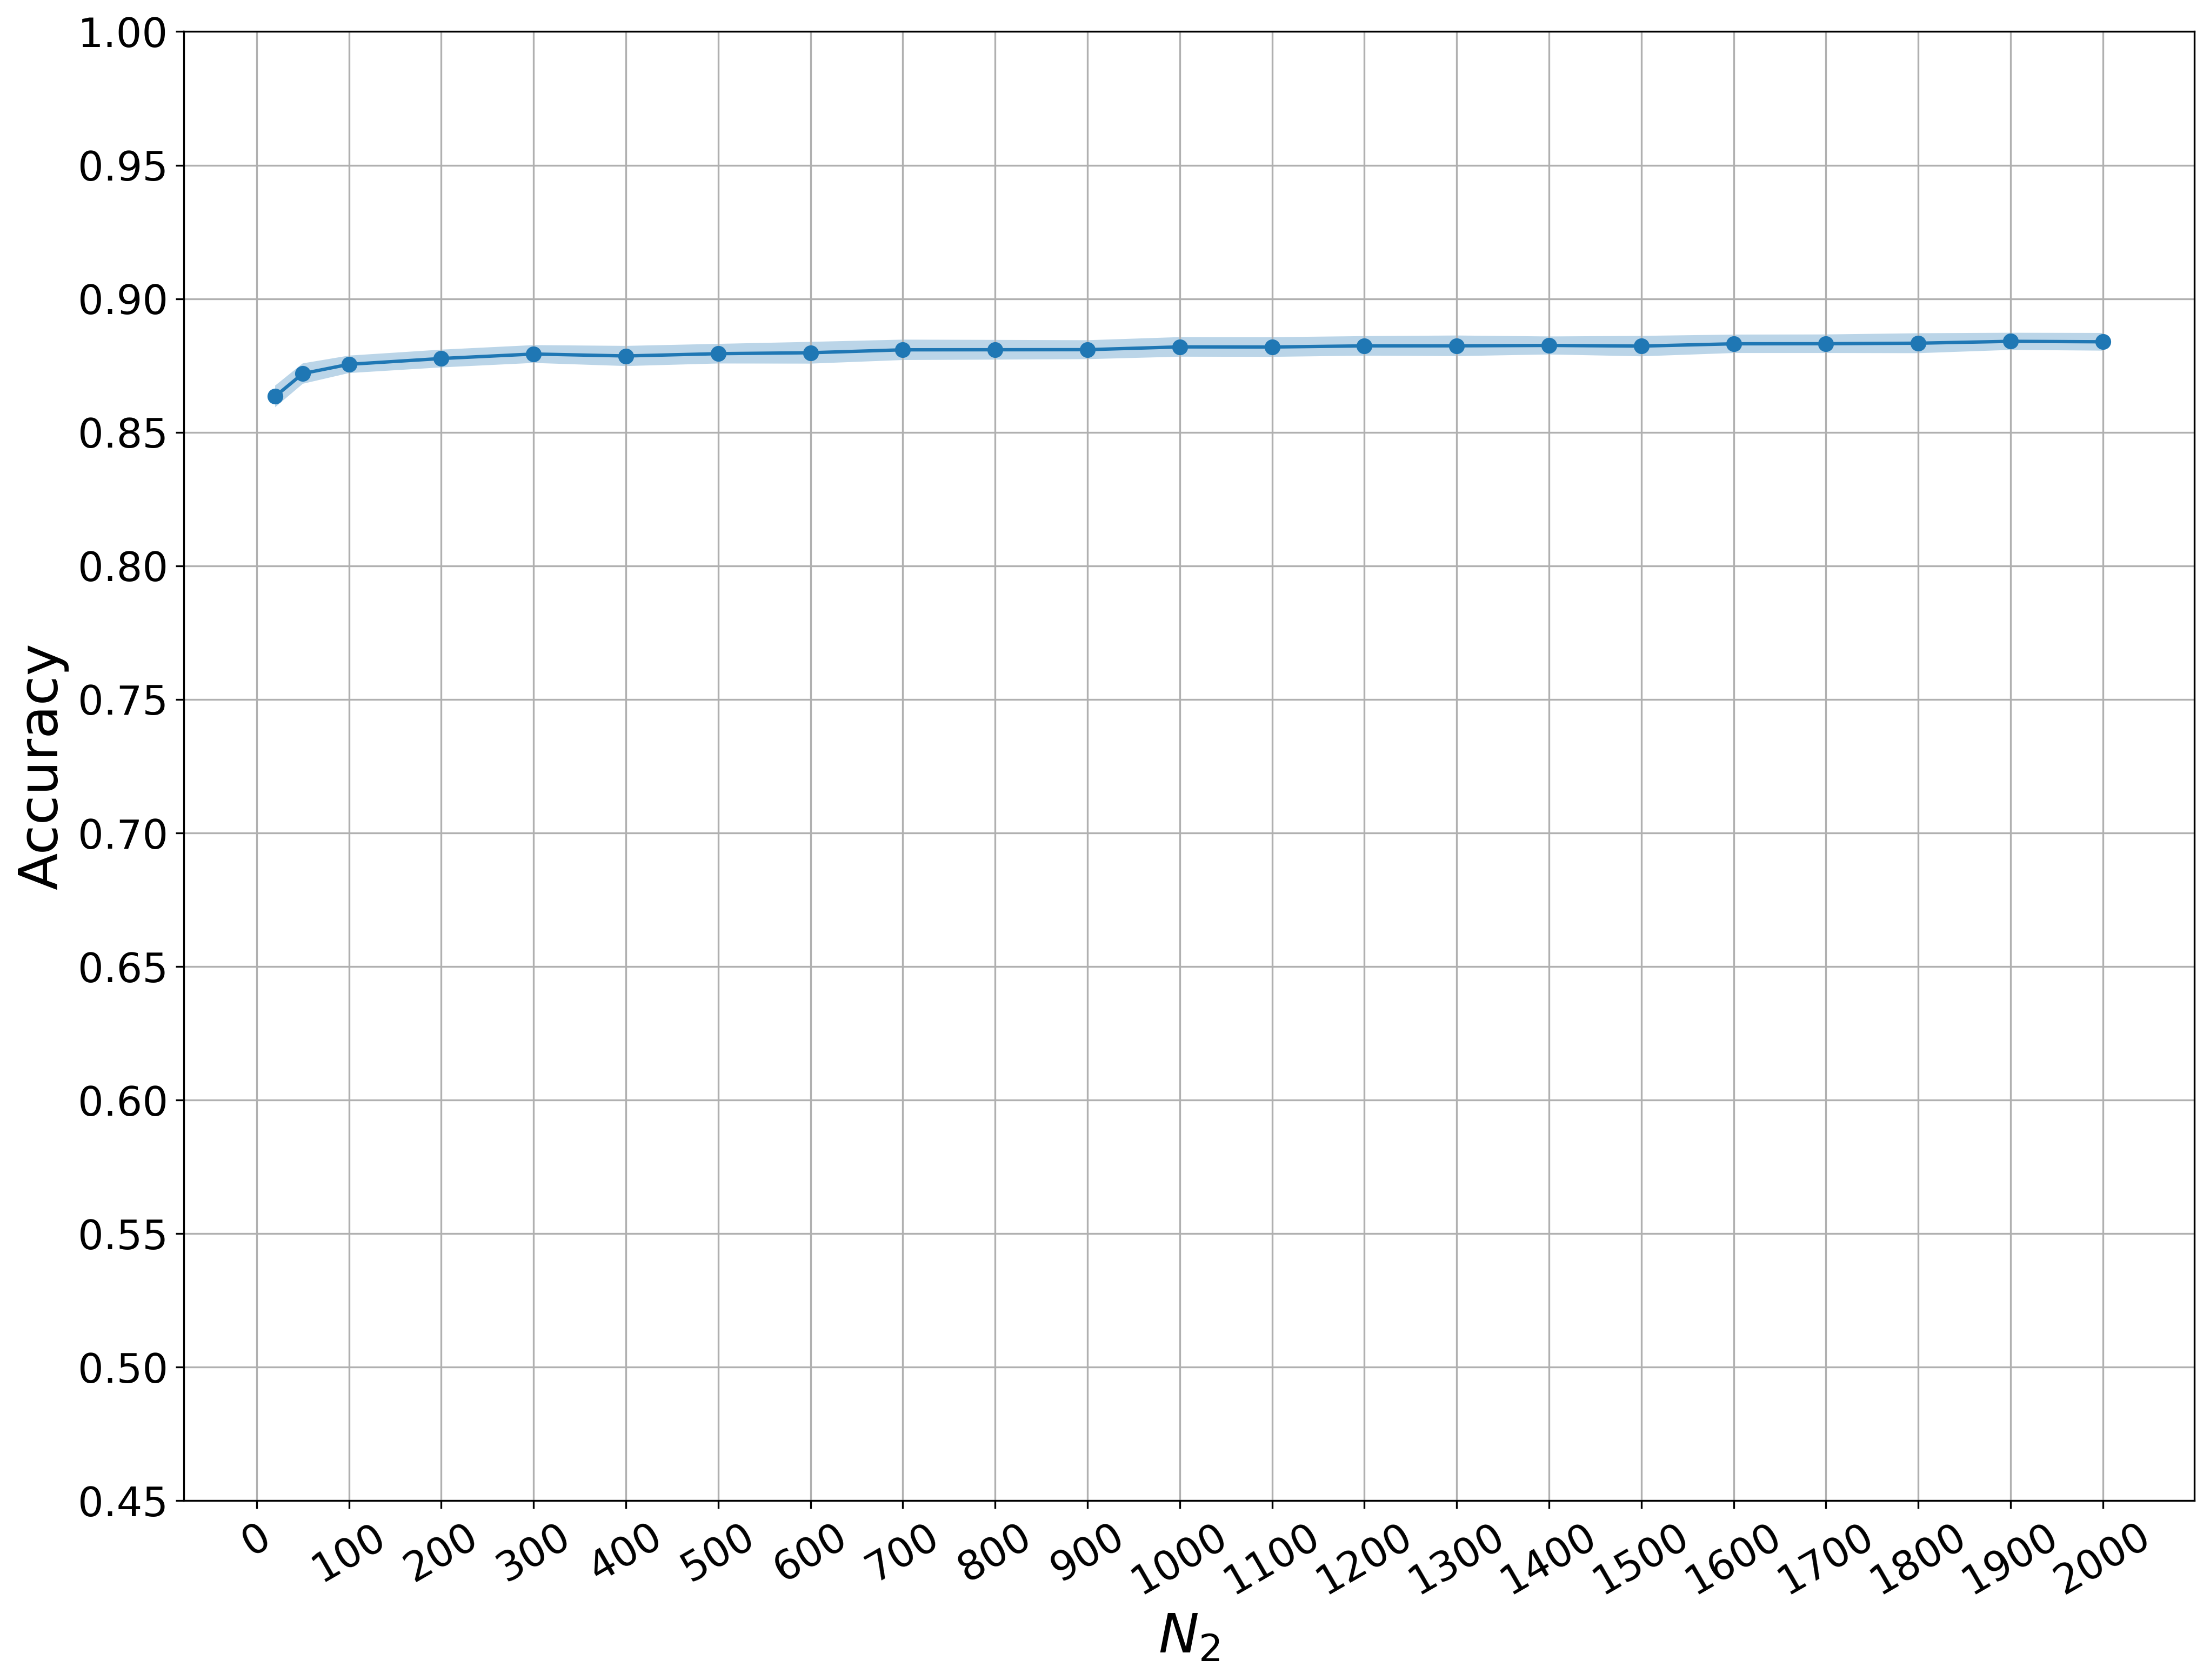

In [32]:
FONTSIZE = 24
plt.figure(figsize=(16,12), dpi=300)

plt.grid()

x = [int(node) for node in nodes_list]

y = dense_param['mean']
err = dense_param['std']
plt.plot(x, y, marker='o', label='classic')
plt.fill_between(x, y - err, y + err, alpha=0.3)

# y = eigvector_param['mean']
# err = eigvector_param['std']
# plt.plot(x, y, marker='o', label='spectral (eigenvectors and eigenvalues)')
# plt.fill_between(x, y - err, y + err, alpha=0.3)

# y = eigvalue_param['mean']
# err = eigvector_param['std']
# plt.plot(x, y, marker='o', label='spectral (just eigenvalues)')
# plt.fill_between(x, y - err, y + err, alpha=0.3)

# y = sparse_param['mean']
# err = sparse_param['std']
# plt.plot(x, y, marker='o', label='sparse')
# plt.fill_between(x, y - err, y + err, alpha=0.3)

plt.xlabel('$N_2$', fontsize=FONTSIZE)
plt.ylabel('Accuracy', fontsize=FONTSIZE)
plt.xticks(np.arange(0, 2100, step=100), fontsize=0.75 * FONTSIZE, rotation='30')
plt.yticks(np.arange(0.45, 1.04, step=0.05), fontsize=0.75 * FONTSIZE)



# plt.legend(loc='lower right', prop={'size': 20})

plt.show()

### Load csv files

In [11]:
ordered_cols = ['model'] + nodes_list.tolist()

In [12]:
df = df[ordered_cols]

In [13]:
df.head()

,model,20,50,100,200,300,400,500,600,700,...,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000
0,dense,0.864583,0.863173,0.877170,0.879666,0.882921,0.880208,0.878472,0.882812,0.878364,...,0.882161,0.881727,0.877279,0.879774,0.879015,0.886068,0.883789,0.884549,0.887804,0.887478
1,dense,0.851454,0.877170,0.877496,0.876845,0.878364,0.879015,0.882053,0.880100,0.881076,...,0.876411,0.886827,0.881619,0.883030,0.879666,0.885091,0.883247,0.882704,0.887912,0.885634
2,dense,0.863064,0.873155,0.876194,0.875326,0.879449,0.878906,0.881076,0.877279,0.880642,...,0.879340,0.886176,0.890951,0.878906,0.876519,0.880425,0.886719,0.880859,0.889648,0.882812
3,dense,0.865126,0.874349,0.880534,0.876302,0.879449,0.871419,0.878255,0.872830,0.875651,...,0.876519,0.883681,0.883030,0.881402,0.878906,0.883355,0.882921,0.880317,0.886610,0.880534
4,dense,0.868056,0.876411,0.874674,0.874783,0.877387,0.870226,0.885308,0.884766,0.879666,...,0.878038,0.879449,0.877496,0.878581,0.884983,0.885091,0.882487,0.888238,0.886393,0.887804


In [14]:
df.to_csv('accuracy_nodes.csv')

In [16]:
mu = dense_param['mean']['1200']
sigma = dense_param['std']['1200']

print(f'accuracy (n_2 = 1200) = {mu} +/- {sigma}')

accuracy (n_2 = 1200) = 0.8823502624034881 +/- 0.003658635864586701


In [30]:
accuracy_diff = eigvector_param['mean']['2000'] - eigvalue_param['mean']['2000']
print(accuracy_diff)

0.06300021648406984
